## Лабораторная № 3. Тематическое моделирование.

*Кузьмина Н.В. J4140*

### 1. Выполните тематическое моделирование отзывов о банковских услугах помощью LDA (используйте библиотеку gensim) для одного из банков. Для уменьшение времени вычисления можно взять выборку отзывов.

In [ ]:
!pip install pyLDAvis

In [ ]:
import pandas as pd
import numpy as np
import re

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [ ]:
# Выгрузим данные, полученные после предварительной обработки отзывов для альфа-банка:
df = pd.read_csv('alfa_bank.csv')
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,bank_href,login,review,bank_name,site,date,message_href,score,status,user_href,preprocessed_text
0,/alfa-bank.html,NaN,История номер раз\nКредитная карта Aeroflot Go...,альфа-банк,http://bankireview.ru,NaN,NaN,NaN,NaN,NaN,история номер кредитный карта aeroflot gold об...
1,/alfa-bank.html,NaN,"Отличный банк Хорошие депозиты, высокие процен...",альфа-банк,http://bankireview.ru,NaN,NaN,NaN,NaN,NaN,отличный банк хороший депозит высокий процент ...
2,/alfa-bank.html,NaN,Только что с жену ограбили во время съёма дене...,альфа-банк,http://bankireview.ru,NaN,NaN,NaN,NaN,NaN,жена ограбить время съём деньга банкомат допол...
3,/alfa-bank.html,NaN,Заполнила заявку на получение дебетовой карты ...,альфа-банк,http://bankireview.ru,NaN,NaN,NaN,NaN,NaN,заполнить заявка получение дебетовый карта nex...
4,/alfa-bank.html,NaN,О сервисе Альфа-клик думаю плохо. Очень плохо....,альфа-банк,http://bankireview.ru,NaN,NaN,NaN,NaN,NaN,сервис альфа-клик думать плохо очень плохо поя...
...,...,...,...,...,...,...,...,...,...,...,...
1255,/bank/alfa-bank/,"Юрий,","Прямо приятно было деньги отдавать :-) Нет, ну...",альфа-банк,https://www.sravni.ru,"19 окт, 2015",/bank/alfa-bank/otzyv/178722/?page,5,NaN,NaN,прямо приятно деньга отдавать правда случиться...
1256,/bank/alfa-bank/,"Павел,",Хороший банкХороший банк,альфа-банк,https://www.sravni.ru,"20 окт, 2015",/bank/alfa-bank/otzyv/83/?page,2,NaN,NaN,хороший банкхороший банк
1257,/bank/alfa-bank/,"Анна Мордовченко,",Общение с клиентами дистанционноОформила креди...,альфа-банк,https://www.sravni.ru,"30 сент, 2018",/bank/alfa-bank/otzyv/299285/?page,3,NaN,NaN,общение клиент дистанционнооформить кредит тел...
1258,/bank/alfa-bank/,"оксана,",Нарушены все сроки рассмотрения заявок на ипот...,альфа-банк,https://www.sravni.ru,"03 окт, 2018",/bank/alfa-bank/otzyv/299519/?page,1,NaN,NaN,нарушить срок рассмотрение заявка ипотека пода...


In [ ]:
# Преобразуем значения "Без оценки" в NaN
df['score'] = df['score'].replace('Без оценки', np.nan)

# Преобразуем значения в столбце 'score' в числовой тип данных
df['score'] = pd.to_numeric(df['score'], errors='coerce')

# Вычисляем среднее значение столбца 'score'
mean_score = df['score'].mean()

# Удаляем все строки, содержащие NaN
df = df.loc[~df['score'].isna()]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(885, 11)

In [ ]:
data = df.preprocessed_text.values.tolist()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

In [ ]:
# tokenize
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[0])
print(len(data_words))

['являться', 'постоянныи', 'клиент', 'альфа', 'банк', 'год', 'иметь', 'несколько', 'полностью', 'выплатить', 'кредит', 'данныи', 'банк', 'являться', 'зарплата', 'клиентом', 'ть', 'январь', 'заполнить', 'саит', 'банк', 'заявка', 'кредит', 'продукт', 'одобрить', 'предложить', 'приити', 'офис', 'оформление', 'сожаление', 'добавление', 'саит', 'кредитныи', 'карта', 'произоити', 'сбои', 'учесть', 'сумма', 'кредит', 'наличными', 'по', 'телефон', 'сообщить', 'проблема', 'необходимо', 'обратиться', 'офис', 'корректировка', 'заявки', 'январь', 'обратиться', 'офис', 'внести', 'корректировка', 'заявка', 'одобрить', 'момент', 'начаться', 'чудо', 'сотрудник', 'банк', 'сказать', 'кредит', 'одобрить', 'заключение', 'договор', 'страхование', 'год', 'срок', 'ич', 'вопрос', 'указывать', 'заявка', 'необходимыи', 'страховка', 'корректировка', 'также', 'задавать', 'данныи', 'вопрос', 'сотрудник', 'ответить', 'решение', 'москва', 'мочь', 'повлиять', 'ть', 'спросить', 'отказаться', 'страховка', 'подчеркивать

In [ ]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=3, threshold=100) # higher threshold =>> fewer number of bigrams.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)

bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# Trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['являться', 'постоянныи', 'клиент', 'альфа', 'банк', 'год', 'иметь', 'несколько', 'полностью', 'выплатить', 'кредит', 'данныи', 'банк', 'являться', 'зарплата', 'клиентом', 'ть', 'январь', 'заполнить', 'саит', 'банк', 'заявка', 'кредит', 'продукт', 'одобрить', 'предложить', 'приити', 'офис', 'оформление', 'сожаление', 'добавление', 'саит', 'кредитныи', 'карта', 'произоити', 'сбои', 'учесть', 'сумма', 'кредит', 'наличными', 'по', 'телефон', 'сообщить', 'проблема', 'необходимо', 'обратиться', 'офис', 'корректировка', 'заявки', 'январь', 'обратиться', 'офис', 'внести', 'корректировка', 'заявка', 'одобрить', 'момент', 'начаться', 'чудо', 'сотрудник', 'банк', 'сказать', 'кредит', 'одобрить', 'заключение', 'договор', 'страхование', 'год', 'срок', 'ич', 'вопрос', 'указывать', 'заявка', 'необходимыи', 'страховка', 'корректировка', 'также', 'задавать', 'данныи', 'вопрос', 'сотрудник', 'ответить', 'решение', 'москва', 'мочь', 'повлиять', 'ть', 'спросить', 'отказаться', 'страховка', 'подчеркивать

In [ ]:
print(bigram_mod[data_words[1]])

['день', 'добрыи', 'мыть', 'мама', 'пенсионер', 'хотеть', 'оформить', 'кредит', 'приехать', 'офис', 'затратить', 'дорога', 'менее', 'час', 'просидеть', 'течение', 'час', 'заполнять', 'анкета', 'хотя', 'анкета', 'заполнить', 'сутки', 'ранее', 'саит', 'алф', 'банк', 'предодобрить', 'сказать', 'банк', 'одобрить', 'железно', 'попросить', 'подождать', 'некоторыи', 'время', 'проверка', 'анкета', 'андераитер', 'час', 'поступить', 'звонок', 'банк', 'спрашивать', 'анкета', 'еметься', 'кредит', 'стороннии', 'банк', 'мина', 'звонок', 'приити', 'смс', 'банк', 'мочь', 'настоящии', 'время', 'выдать', 'кредит', 'шооокии', 'сотрудник', 'лицо', 'банк', 'говорить', 'одобрить', 'ноль', 'цена', 'скорее', 'лицензия', 'лишить', 'альфа', 'банк', 'банк', 'отвечать', 'слово']


In [ ]:
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

In [ ]:
data_words_bigrams = make_bigrams(data_words)

In [ ]:
# Преобразование текста в формат, понятный Gensim
texts = data_words_bigrams
id2word = corpora.Dictionary(texts)
corpus = [id2word.doc2bow(text) for text in texts]

In [ ]:
print(corpus[:1])

[[(0, 1), (1, 8), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 3), (8, 1), (9, 2), (10, 4), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 4), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 2), (35, 1), (36, 3), (37, 4), (38, 3), (39, 1), (40, 1), (41, 2), (42, 1), (43, 1), (44, 1), (45, 2), (46, 1), (47, 1), (48, 2), (49, 1), (50, 1), (51, 2), (52, 4), (53, 1), (54, 2), (55, 1), (56, 1), (57, 1), (58, 3), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 2), (68, 1), (69, 2), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 3), (77, 1), (78, 1), (79, 1), (80, 2), (81, 2), (82, 1), (83, 1), (84, 1), (85, 2), (86, 1), (87, 1), (88, 1), (89, 5), (90, 1), (91, 1), (92, 4), (93, 4), (94, 1), (95, 1), (96, 1), (97, 1), (98, 1), (99, 1), (100, 2), (101, 1), (102, 1), (103, 1), (104, 1), (105, 3), (106, 2)]]


In [ ]:
print(corpus[1])

[(0, 1), (1, 8), (25, 1), (37, 3), (42, 1), (52, 2), (58, 1), (73, 1), (81, 1), (85, 1), (89, 1), (107, 1), (108, 1), (109, 4), (110, 2), (111, 1), (112, 1), (113, 1), (114, 1), (115, 1), (116, 1), (117, 1), (118, 1), (119, 1), (120, 2), (121, 1), (122, 1), (123, 1), (124, 1), (125, 1), (126, 1), (127, 1), (128, 1), (129, 1), (130, 1), (131, 1), (132, 1), (133, 1), (134, 1), (135, 1), (136, 1), (137, 1), (138, 1), (139, 1), (140, 1), (141, 1), (142, 1), (143, 1), (144, 1), (145, 1), (146, 1), (147, 1), (148, 1), (149, 1), (150, 1), (151, 1), (152, 3), (153, 1)]


In [ ]:
len(corpus)

885

In [ ]:
[[(id2word[id], freq) for id, freq in enumerate(cp)] for cp in corpus[:1]]

[[('альфа', (0, 1)),
  ('банк', (1, 8)),
  ('брать', (2, 1)),
  ('вид', (3, 1)),
  ('видимо', (4, 1)),
  ('включить', (5, 1)),
  ('внести', (6, 1)),
  ('вопрос', (7, 3)),
  ('выплатить', (8, 1)),
  ('год', (9, 2)),
  ('данныи', (10, 4)),
  ('дать', (11, 1)),
  ('деиствие', (12, 1)),
  ('добавление', (13, 1)),
  ('добровольныи', (14, 1)),
  ('договор', (15, 1)),
  ('дорогои', (16, 1)),
  ('забивать', (17, 1)),
  ('зависеть', (18, 1)),
  ('задавать', (19, 1)),
  ('задать', (20, 1)),
  ('заключение', (21, 1)),
  ('закона', (22, 1)),
  ('заменить', (23, 1)),
  ('заново', (24, 1)),
  ('заполнить', (25, 1)),
  ('зарплата', (26, 1)),
  ('заявка', (27, 4)),
  ('заявки', (28, 1)),
  ('иии', (29, 1)),
  ('иметь', (30, 1)),
  ('исключение', (31, 1)),
  ('ич', (32, 1)),
  ('карта', (33, 1)),
  ('клиент', (34, 2)),
  ('клиентом', (35, 1)),
  ('корректировка', (36, 3)),
  ('кредит', (37, 4)),
  ('кредитныи', (38, 3)),
  ('менять', (39, 1)),
  ('момент', (40, 1)),
  ('москва', (41, 2)),
  ('мочь', (4

In [ ]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

### 2. Найдите оптимальное количество тем в соответствии с метриками: 1) Perplexity score 2) Coherence score. Есть ли различия?

In [ ]:
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Num Topics = 5, Perplexity = -7.5825, Coherence = 0.4048
Num Topics = 10, Perplexity = -7.9979, Coherence = 0.4468
Num Topics = 15, Perplexity = -9.7541, Coherence = 0.4521
Num Topics = 20, Perplexity = -10.5867, Coherence = 0.5032
Num Topics = 25, Perplexity = -11.3854, Coherence = 0.4490
Num Topics = 30, Perplexity = -12.1783, Coherence = 0.4460
Num Topics = 35, Perplexity = -13.0152, Coherence = 0.4700
Num Topics = 40, Perplexity = -13.8080, Coherence = 0.4231
Num Topics = 45, Perplexity = -14.6299, Coherence = 0.4478
Num Topics = 50, Perplexity = -15.4625, Coherence = 0.4497


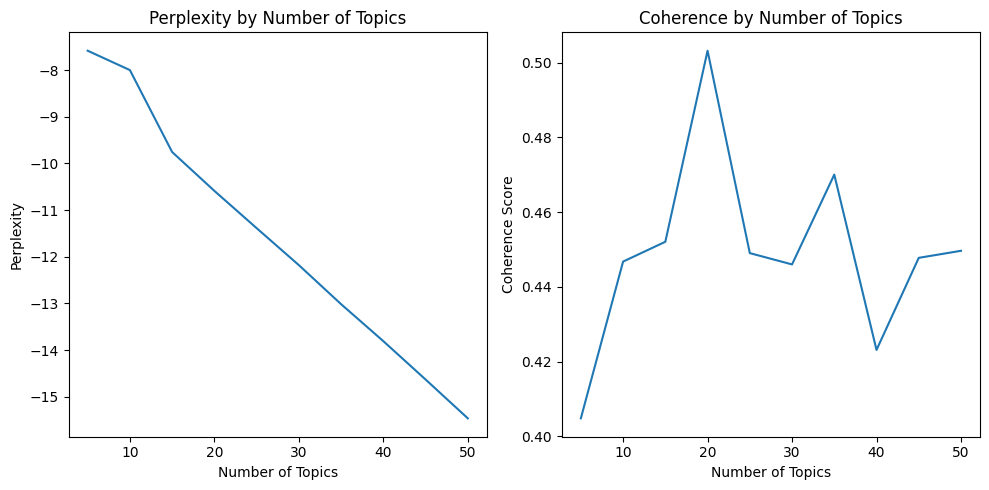

In [ ]:
# Диапазон количества тем для исследования
topics_range = range(5, 51, 5)

# Сохраняем значения метрик для каждой модели
coherence_values = []
perplexity_values = []

for num_topics in topics_range:
    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                                id2word=id2word,
                                                num_topics=num_topics,
                                                random_state=100,
                                                update_every=1,
                                                chunksize=100,
                                                passes=10,
                                                alpha='auto',
                                                per_word_topics=True)

    # Вычисляем перплексию
    perplexity = lda_model.log_perplexity(corpus)
    perplexity_values.append(perplexity)

    # Вычисляем когерентность
    coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=id2word, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    coherence_values.append(coherence_lda)

    print(f"Num Topics = {num_topics}, Perplexity = {perplexity:.4f}, Coherence = {coherence_lda:.4f}")


plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.plot(topics_range, perplexity_values)
plt.title("Perplexity by Number of Topics")
plt.xlabel("Number of Topics")
plt.ylabel("Perplexity")

plt.subplot(1, 2, 2)
plt.plot(topics_range, coherence_values)
plt.title("Coherence by Number of Topics")
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")

plt.tight_layout()
plt.show()

Различия между этими метриками заключаются в том, что перплексия фокусируется на качестве прогнозирования новых данных, в то время как когерентность оценивает интерпретируемость тем.

1. Отрицательное значение перплексии говорит о том, что модель хорошо предсказывает новые данные.
2. Чем выше значение когерентности, тем лучше модель.


Когерентность, достигает пика при 20 темах с показателем 0.5032, после чего начинает колебаться, но не достигает значительно высших значений при дальнейшем увеличении числа тем.

Перплексия уменьшается (улучшается) с увеличением числа тем, что является ожидаемым, поскольку более детализированные модели обычно лучше описывают данные.

Основываясь на этих наблюдениях,при **20 темах** достигается самая высокая когерентность, что указывает на лучшую интерпретируемость и семантическую связность тем, при этом перплексия продолжает уменьшаться, что указывает на улучшение предсказательной способности модели.

In [ ]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=15,
                                           alpha='auto',
                                           per_word_topics=True)

In [ ]:
from pprint import pprint

In [ ]:
# Выведем 20 тем с ключевыми словами
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.074*"утро" + 0.040*"вернуться" + 0.036*"дом" + 0.030*"лежать" + '
  '0.025*"вечер" + 0.025*"ребенок" + 0.024*"рассказывать" + 0.024*"август" + '
  '0.018*"фамилия" + 0.017*"сосед"'),
 (1,
  '0.026*"дарья" + 0.022*"баланс" + 0.017*"директ" + 0.014*"брокерскии" + '
  '0.008*"индивидуальныи_подход" + 0.005*"вывести" + 0.002*"гарибальдь" + '
  '0.002*"оперативныи" + 0.000*"обмен" + 0.000*"облигация"'),
 (2,
  '0.037*"терминал" + 0.022*"экран" + 0.018*"александрович" + 0.018*"аба" + '
  '0.016*"возвращение" + 0.013*"надпись" + 0.012*"фактически" + '
  '0.012*"прошлое" + 0.011*"скрин" + 0.009*"частность"'),
 (3,
  '0.049*"карта" + 0.025*"кэшбэк" + 0.019*"кстати" + 0.019*"месяц" + '
  '0.017*"декабрь" + 0.017*"кэшбек" + 0.017*"категория" + 0.017*"тратить" + '
  '0.016*"трата" + 0.016*"миля"'),
 (4,
  '0.018*"упоминание" + 0.000*"протяжение" + 0.000*"заглянуть" + '
  '0.000*"вразумительныи" + 0.000*"точка_продажа" + 0.000*"нести" + '
  '0.000*"тихии" + 0.000*"ответственность" + 0.000

### 3. Как бы вы назвали каждую тему? Обоснуйте.

Для названия каждой темы в модели LDA использовались наиболее часто встречающиеся слова (токены) в каждой теме. Эти слова служат ключевыми терминами для определения содержания каждой темы.

0. Домашние дела и семья: Ключевые слова связанны с влиянием банковских услуг на семейный быт.
1. Финансовое планирование: Обсуждение управления балансом, брокерскими услугами и инвестициями.
2. Технические вопросы: "терминал", "экран", "надпись" могут относиться к использованию банкоматов или терминалов.
3. Бонусные программы: Частые упоминания "карта", "кэшбэк", "категория", "миля".
4. Неопределенная/техническая тема: Множество слов с нулевым весом говорят о том, что тема либо малоинформативна, либо не была достаточно выделена моделью.
5. Ипотека: "ипотека", "сделка", "ставка" явно указывают на обсуждение ипотечного кредитования.
6. Обслуживание клиентов: Слова "руководитель", "отвратительный", "перезванивать" могут отражать отзывы о качестве обслуживания.
7. Кэшбэк и расходы: Аналогично с кэшбэком, но с упором на "расходы" и "максимум" бонусов.
Банковские комиссии: Оплата комиссий, условия по картам и тарифы.
8. Комиссии и операции с картой: "комиссия", "карта", "операция" связаны с финансовыми операциями и условиями.
9. Клиентский сервис: Упоминания "висеть", "юлия", "россия" могут быть связаны с определенными случаями в банковском обслуживании.
10. Неопределенная или малоинформативная тема: Похоже на технический шум или очень редко упоминаемые темы.
11. Личный опыт с банком: "неожиданно", "доказательство" могут отражать личные истории общения с банком.
12. Оформление карт и кредитов:"карта", "день", "оформить", "отделение" указывают на процессы, связанные с кредитными картами.
13. Страховые услуги: "страховка", "услуга", "договор", "страхование" ясно говорят о страховых продуктах банка.
14. Отзывы о работе сотрудников: "вовремя", "работник", "маи"
15. Специфические отзывы: Могут содержать редкие или уникальные упоминания.
16. Благодарности и отзывы: Выражение благодарности за качественную консультацию и обслуживание ("консультация", "благодарность")
17. Юридические аспекты: Возможно, связано с юридическими вопросами и условиями обслуживания.
18. Закрытие счетов и управление долгами:"справка", "задолженность", "погасить", "рассрочка" связаны с процессами закрытия счетов и погашения кредитов.
19. Общее взаимодействие с банком: "банк", "альфа", "счет", "кредит" отражают общие аспекты работы с банком.

### 4. Визуализируйте темы с помощью пакета pyLDAvis.

In [ ]:
# LDAvis
import pyLDAvis
import pyLDAvis.gensim_models

In [ ]:
# Визуализация тем
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
vis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
19     0.347470  0.185156       1        1  66.449031
12     0.383024  0.137683       2        1  14.754477
8      0.279739 -0.165699       3        1   8.614530
13     0.198711 -0.291146       4        1   4.130179
3      0.043375 -0.001999       5        1   2.086034
18    -0.052058 -0.038314       6        1   0.765651
0     -0.090280  0.011351       7        1   0.523667
16    -0.091407  0.012723       8        1   0.475756
5     -0.072402  0.025532       9        1   0.439356
6     -0.091883  0.011718      10        1   0.369246
14    -0.092133  0.010968      11        1   0.367089
9     -0.089780  0.011588      12        1   0.256812
2     -0.089778  0.011763      13        1   0.232483
7     -0.089116  0.012458      14        1   0.216047
17    -0.085434  0.010294      15        1   0.116579
1     -0.084410  0.011105      16        1   0.083091
11    -0.082944  0.011399      17        1   0.056507
15    -0.081060  0.011198      18        1   0.034866
4     -0.080336  0.011170      19        1   0.019684
10    -0.079299  0.011051      20        1   0.008915, topic_info=          Term         Freq        Total Category  logprob  loglift
33       карта  2337.000000  2337.000000  Default  30.0000  30.0000
15     договор   421.000000   421.000000  Default  29.0000  29.0000
93   страховка   363.000000   363.000000  Default  28.0000  28.0000
478     услуга   398.000000   398.000000  Default  27.0000  27.0000
167      месяц   435.000000   435.000000  Default  26.0000  26.0000
..         ...          ...          ...      ...      ...      ...
25   заполнить     0.000891    24.485076  Topic20  -9.1396  -0.8958
26    зарплата     0.000891    56.628996  Topic20  -9.1396  -1.7343
27      заявка     0.000891   280.425008  Topic20  -9.1396  -3.3341
28      заявки     0.000891     4.957347  Topic20  -9.1396   0.7014
29         иии     0.000891     0.570443  Topic20  -9.1396   2.8636

[884 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
2606     10  0.928761   alfatravel
2318      4  0.989647     cashback
695       3  0.963703           ru
2401      1  0.756598          аба
2401     13  0.232799          аба
...     ...       ...          ...
1798     15  0.913695  юридическии
105       1  0.983768     являться
105       2  0.015492     являться
106       1  0.576202       январь
106       3  0.424949       январь

[682 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[20, 13, 9, 14, 4, 19, 1, 17, 6, 7, 15, 10, 3, 8, 18, 2, 12, 16, 5, 11])

### 5. Связаны ли темы отзывовов и поле “Score” в данных? Обоснуйте.

In [ ]:
import seaborn as sns
from scipy import stats

In [ ]:
# Функция для определения преобладающей темы в каждом отзыве
def format_topics_sentences(ldamodel, corpus):
    data = []

    # Получаем основную тему в каждом документе
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row[0], key=lambda x: (x[1]), reverse=True)
        # Получаем доминирующую тему и её вклад
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => доминирующая тема
                # Добавляем информацию в список
                data.append([int(topic_num), round(prop_topic, 4)])
                break  # Прерываем цикл после добавления первой (доминирующей) темы

    # Создаем DataFrame из собранных данных
    sent_topics_df = pd.DataFrame(data, columns=['Dominant_Topic', 'Perc_Contribution'])

    return sent_topics_df

# Применяем функцию
df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus)

# Соединяем с исходным DataFrame
df = pd.concat([df.reset_index(drop=True), df_topic_sents_keywords], axis=1)

# Агрегация рейтингов по темам
df_grouped = df.groupby('Dominant_Topic').agg(
    Mean_Score=('score', 'mean'),
    Std_Score=('score', 'std'),
    Count=('Dominant_Topic', 'count')
).reset_index()



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:1281: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(aggregator, agg_var)


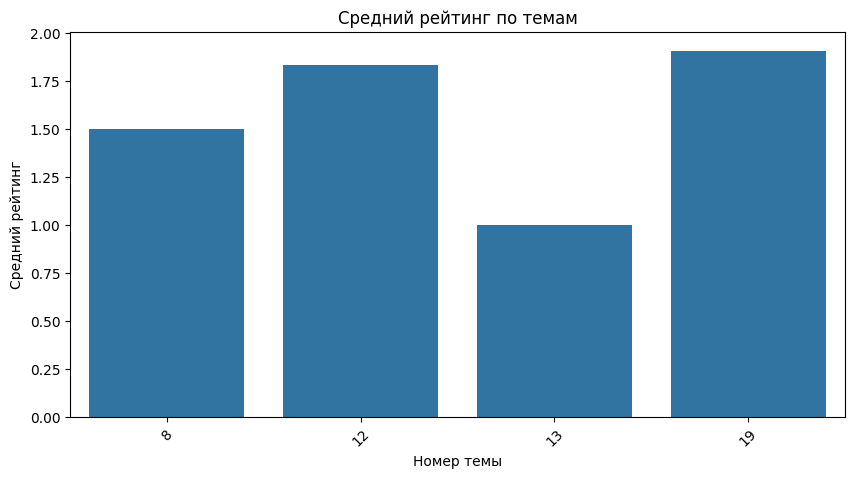

In [ ]:
# Визуализация среднего рейтинга по темам
plt.figure(figsize=(10, 5))
sns.barplot(x='Dominant_Topic', y='Mean_Score', data=df_grouped)
plt.title('Средний рейтинг по темам')
plt.xlabel('Номер темы')
plt.ylabel('Средний рейтинг')
plt.xticks(rotation=45)
plt.show()

По данному рейтингу видно, что тема тема 19 "Общее взаимодействие с банком" получила самую высокую среднюю оценку из представленных (при этом средняя оценка примерно 2/5, что достаточно низко), что может указывать на то, что в целом клиенты более удовлетворены общим взаимодействием с банком, чем конкретными услугами, такими как страхование или процесс оформления карт и кредитов.